# Progetto finale CRO

In [373]:
import math
import random
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib.animation import FuncAnimation
from scipy.optimize import differential_evolution
from matplotlib.patches import Patch
from deap import base, creator, tools, algorithms
import random
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate


from scipy.cluster.hierarchy import fcluster
from scipy.optimize import minimize
from scipy.stats.stats import pearsonr
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model

import keras_tuner as kt
from deap import base, creator, tools, algorithms

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import RandomizedSearchCV


import altair as alt

import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

import joblib
import pygad

/var/folders/z5/ql92fy5n5md52b43qh02f6km0000gn/T/ipykernel_59025/547583165.py:25: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


## Data cleaning

In [432]:
df = pd.read_csv('df_definitivo.csv')

In [375]:
df.head()

,ad_spend,time_on_site,pages_per_visit,website_visits,bounce_rate,social_shares,email_opens,email_clicks,conversion_rate
0,1885.209792,22.169951,21.0,89,0.400454,11,77,3,4.992526
1,4754.557246,6.350848,6.0,28,0.103295,43,17,26,6.454543
2,3665.329830,11.052551,11.0,77,0.638079,16,0,3,5.799816
3,3001.319251,20.235138,20.0,32,0.466222,8,65,16,5.776421
4,796.972829,14.980591,14.0,48,0.462717,14,17,13,3.465574


In [433]:
print(df.isnull().sum()) 
print(np.isinf(df).sum())

ad_spend           0
time_on_site       0
pages_per_visit    0
website_visits     0
bounce_rate        0
social_shares      0
email_opens        0
email_clicks       0
conversion_rate    0
dtype: int64
ad_spend           0
time_on_site       0
pages_per_visit    0
website_visits     0
bounce_rate        0
social_shares      0
email_opens        0
email_clicks       0
conversion_rate    0
dtype: int64


In [377]:
df = df.replace([np.inf, -np.inf], np.nan)  
df = df.dropna() 


print(df.isnull().sum())

ad_spend           0
time_on_site       0
pages_per_visit    0
website_visits     0
bounce_rate        0
social_shares      0
email_opens        0
email_clicks       0
conversion_rate    0
dtype: int64


## Modello xgb per predire conversion rate con features principali

In [378]:
features = ['ad_spend', 'time_on_site', 'pages_per_visit', 'website_visits', 'bounce_rate', 'social_shares']
X = df[features]
y = df['conversion_rate']

# Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creazione del modello Gradient Boosting
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Addestramento del modello
xgb_model.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = xgb_model.predict(X_test)

# Valutazione delle performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 0.03449106326132695
MSE: 0.0019235757583628563
R²: 0.9989789269251389


In [379]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [380]:
def print_metrics(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Metrics for {dataset_name} set:")
    print(f"  - MAE: {mae:.4f}")
    print(f"  - RMSE: {rmse:.4f}")
    print(f"  - R²: {r2:.4f}")
    print()

# Stampa delle metriche per il training set
print_metrics(y_train, y_train_pred, "Training")

# Stampa delle metriche per il test set
print_metrics(y_test, y_test_pred, "Test")


Metrics for Training set:
  - MAE: 0.0309
  - RMSE: 0.0389
  - R²: 0.9992

Metrics for Test set:
  - MAE: 0.0345
  - RMSE: 0.0439
  - R²: 0.9990



### Performance modello

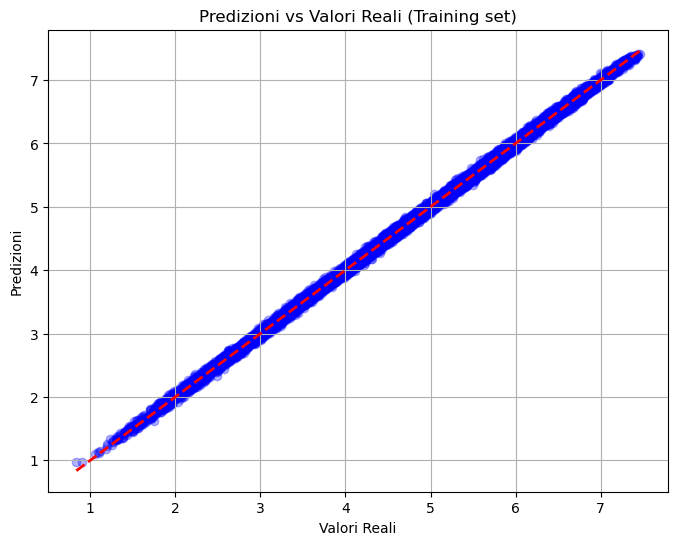

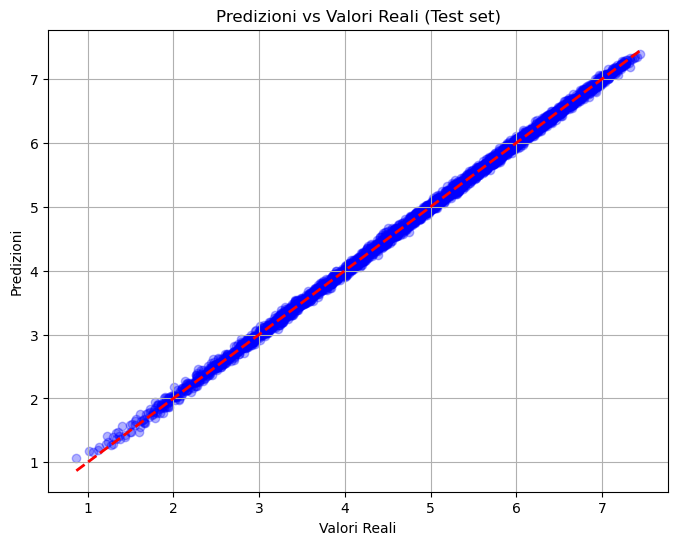

In [329]:
def plot_predictions(y_true, y_pred, dataset_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.3, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Valori Reali')
    plt.ylabel('Predizioni')
    plt.title(f'Predizioni vs Valori Reali ({dataset_name} set)')
    plt.grid(True)
    plt.show()

# Visualizzazione per il training set
plot_predictions(y_train, y_train_pred, "Training")

# Visualizzazione per il test set
plot_predictions(y_test, y_test_pred, "Test")

Training Metrics (MAE, RMSE, R²): (0.030879535274705286, 0.03891404353788483, 0.9991781463599686)
Test Metrics (MAE, RMSE, R²): (0.03449106326132695, 0.043858588193908574, 0.9989789269251389)


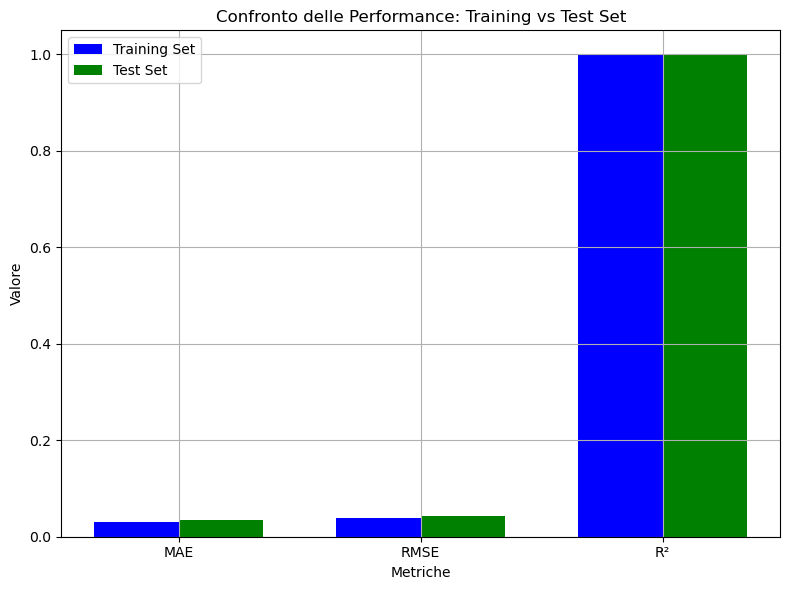

In [381]:
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

train_metrics = calculate_metrics(y_train, y_train_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# Visualizzazione delle metriche in un grafico a barre
def plot_metric_comparison(train_metrics, test_metrics):
    metrics = ['MAE', 'RMSE', 'R²']
    train_values = list(train_metrics)
    test_values = list(test_metrics)

    # Creazione del grafico a barre per le metriche di training e test
    x = np.arange(len(metrics))  # Numero di metriche
    width = 0.35  # Larghezza delle barre

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(x - width/2, train_values, width, label='Training Set', color='blue')
    ax.bar(x + width/2, test_values, width, label='Test Set', color='green')

    # Etichette e titolo
    ax.set_xlabel('Metriche')
    ax.set_ylabel('Valore')
    ax.set_title('Confronto delle Performance: Training vs Test Set')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Stampa delle metriche per il training e test set
print("Training Metrics (MAE, RMSE, R²):", train_metrics)
print("Test Metrics (MAE, RMSE, R²):", test_metrics)

# Visualizzazione del grafico di confronto
plot_metric_comparison(train_metrics, test_metrics)

### Feature importance

In [382]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

<Figure size 1000x600 with 0 Axes>

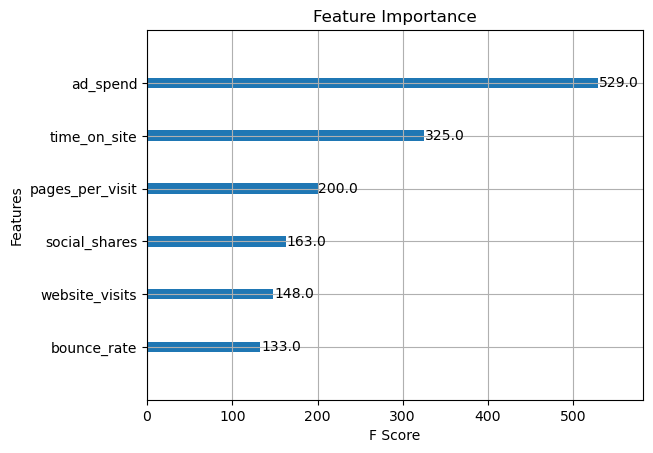

In [383]:
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='weight', title='Feature Importance', xlabel='F Score', ylabel='Features')
plt.show()

## Algoritmo con adspend bloccato

### media features 

In [384]:
mean_features = df.mean()

# Stampa delle medie numericamente
print("Medie delle feature e del conversion rate:")
print(mean_features)

Medie delle feature e del conversion rate:
ad_spend           2505.205185
time_on_site         15.604976
pages_per_visit      15.631951
website_visits       49.905641
bounce_rate           0.400248
social_shares        24.280906
email_opens          49.532193
email_clicks         14.503028
conversion_rate       4.992450
dtype: float64


### Algoritmo genetico

In [385]:
# Rimuoviamo le colonne non necessarie dal DataFrame
df = df.drop(columns=['email_opens', 'email_clicks'], errors='ignore')

# Media attuale del conversion rate
current_conversion_rate_mean = df['conversion_rate'].mean()

# Definizione dei vincoli per ciascuna feature
feature_means = {
    'time_on_site': df['time_on_site'].mean(),
    'pages_per_visit': df['pages_per_visit'].mean(),
    'website_visits': df['website_visits'].mean(),
    'social_shares': df['social_shares'].mean(),
    'bounce_rate': df['bounce_rate'].mean()
}

# Funzione fitness con penalità severe per violazioni dei vincoli
def fitness_function(individual):
    X_what_if = df.copy()
    
    # Manteniamo AdSpend fisso
    X_what_if['ad_spend'] = df['ad_spend'].mean()  
    
    # Aggiorniamo le altre feature ottimizzabili
    X_what_if['time_on_site'] = individual[0]
    X_what_if['pages_per_visit'] = individual[1]
    X_what_if['website_visits'] = individual[2]
    X_what_if['social_shares'] = individual[3]
    
    # Bounce Rate limitato al massimo -10%
    X_what_if['bounce_rate'] = max(individual[4], feature_means['bounce_rate'] * 0.90)
    
    # Previsione del conversion rate con il modello addestrato
    y_pred_what_if = xgb_model.predict(X_what_if.drop(columns=['conversion_rate']))
    new_conversion_rate_mean = y_pred_what_if.mean()

    # Penalità per violazione dei vincoli sulle feature
    penalty = 0
    if individual[0] > feature_means['time_on_site'] * 1.10:
        penalty += abs(individual[0] - feature_means['time_on_site'] * 1.10)
    if individual[1] > feature_means['pages_per_visit'] * 1.10:
        penalty += abs(individual[1] - feature_means['pages_per_visit'] * 1.10)
    if individual[2] > feature_means['website_visits'] * 1.10:
        penalty += abs(individual[2] - feature_means['website_visits'] * 1.10)
    if individual[3] > feature_means['social_shares'] * 1.10:
        penalty += abs(individual[3] - feature_means['social_shares'] * 1.10)
    if individual[4] < feature_means['bounce_rate'] * 0.90:
        penalty += abs(individual[4] - feature_means['bounce_rate'] * 0.90)
    
    # Fitness è il conversion rate con penalità applicata
    return new_conversion_rate_mean - penalty,

# Impostazioni per DEAP (algoritmo genetico)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Inizializza le feature con vincoli severissimi
toolbox.register("attr_float_time", random.uniform, feature_means['time_on_site'], feature_means['time_on_site'] * 1.10)  # Solo aumento massimo 10%
toolbox.register("attr_float_pages", random.uniform, feature_means['pages_per_visit'], feature_means['pages_per_visit'] * 1.10)  # Solo aumento massimo 10%
toolbox.register("attr_float_visits", random.uniform, feature_means['website_visits'], feature_means['website_visits'] * 1.10)  # Solo aumento massimo 10%
toolbox.register("attr_float_social", random.uniform, feature_means['social_shares'], feature_means['social_shares'] * 1.10)  # Solo aumento massimo 10%
toolbox.register("attr_float_bounce", random.uniform, feature_means['bounce_rate'] * 0.90, feature_means['bounce_rate'])  # Bounce rate può diminuire massimo del 10%

# Crea l'individuo con tutte le feature
toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_float_time, toolbox.attr_float_pages, toolbox.attr_float_visits, 
                  toolbox.attr_float_social, toolbox.attr_float_bounce), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.05, indpb=0.2)  # Mutazione ridotta per rispettare vincoli severi
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

# Parametri evolutivi
population = toolbox.population(n=50)
NGEN = 40
CXPB = 0.7
MUTPB = 0.2

# Esecuzione dell'algoritmo genetico
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = list(map(toolbox.evaluate, offspring))
    
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    
    population = toolbox.select(offspring, k=len(population))

# Selezione della soluzione ottimale
best_individual = tools.selBest(population, 1)[0]

# Risultati ottimizzati per le feature
optimal_features = best_individual

# Stampa delle feature ottimizzate
print(f"Valori ottimizzati delle feature per il miglioramento del conversion rate:")
print(f"AdSpend (bloccato): {df['ad_spend'].mean():.2f}")
print(f"TimeOnSite: da {df['time_on_site'].mean():.2f} a {optimal_features[0]:.2f}")
print(f"PagesPerVisit: da {df['pages_per_visit'].mean():.2f} a {optimal_features[1]:.2f}")
print(f"WebsiteVisits: da {df['website_visits'].mean():.2f} a {optimal_features[2]:.2f}")
print(f"SocialShares: da {df['social_shares'].mean():.2f} a {optimal_features[3]:.2f}")
print(f"BounceRate: da {df['bounce_rate'].mean():.2f} a {optimal_features[4]:.2f}")

# Calcolo delle variazioni in percentuale
def percent_change(original, optimized):
    return ((optimized - original) / original) * 100

print("\nVariazioni percentuali rispetto alle medie originali:")
print(f"TimeOnSite: {percent_change(df['time_on_site'].mean(), optimal_features[0]):.2f}%")
print(f"PagesPerVisit: {percent_change(df['pages_per_visit'].mean(), optimal_features[1]):.2f}%")
print(f"WebsiteVisits: {percent_change(df['website_visits'].mean(), optimal_features[2]):.2f}%")
print(f"SocialShares: {percent_change(df['social_shares'].mean(), optimal_features[3]):.2f}%")
print(f"BounceRate: {percent_change(df['bounce_rate'].mean(), optimal_features[4]):.2f}%")

# Previsione del nuovo conversion rate
X_test_what_if = df.copy()
X_test_what_if['ad_spend'] = df['ad_spend'].mean()  # AdSpend fisso
X_test_what_if['time_on_site'] = optimal_features[0]
X_test_what_if['pages_per_visit'] = optimal_features[1]
X_test_what_if['website_visits'] = optimal_features[2]
X_test_what_if['social_shares'] = optimal_features[3]
X_test_what_if['bounce_rate'] = optimal_features[4]

y_pred_what_if = xgb_model.predict(X_test_what_if.drop(columns=['conversion_rate']))
new_conversion_rate_mean = y_pred_what_if.mean()

# Calcolo della variazione percentuale del conversion rate
conversion_rate_change = percent_change(current_conversion_rate_mean, new_conversion_rate_mean)

print(f"\nConversion Rate medio attuale: {current_conversion_rate_mean:.4f}")
print(f"Conversion Rate ottimizzato: {new_conversion_rate_mean:.4f}")
print(f"Variazione percentuale del Conversion Rate: {conversion_rate_change:.2f}%")


/opt/anaconda3/envs/env_DAs/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/anaconda3/envs/env_DAs/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Valori ottimizzati delle feature per il miglioramento del conversion rate:
AdSpend (bloccato): 2505.21
TimeOnSite: da 15.60 a 16.74
PagesPerVisit: da 15.63 a 16.27
WebsiteVisits: da 49.91 a 50.80
SocialShares: da 24.28 a 26.39
BounceRate: da 0.40 a 0.36

Variazioni percentuali rispetto alle medie originali:
TimeOnSite: 7.30%
PagesPerVisit: 4.11%
WebsiteVisits: 1.79%
SocialShares: 8.68%
BounceRate: -9.31%

Conversion Rate medio attuale: 4.9925
Conversion Rate ottimizzato: 5.3232
Variazione percentuale del Conversion Rate: 6.62%


### Fitness algoritmo adspend bloccato

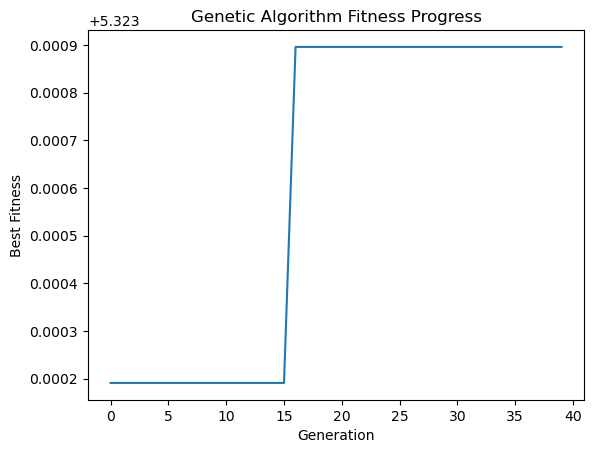

In [386]:
gen_fitness = []

# Esecuzione dell'algoritmo genetico con monitoraggio della fitness
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = list(map(toolbox.evaluate, offspring))
    
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    
    population = toolbox.select(offspring, k=len(population))
    
    # Memorizzazione della migliore fitness in ogni generazione
    best_fitness = max([ind.fitness.values[0] for ind in population])
    gen_fitness.append(best_fitness)

# Visualizzazione del plot della fitness
plt.plot(gen_fitness)
plt.title('Genetic Algorithm Fitness Progress')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.show()

L'algorimto  rileva ottimizzazioni dopo 15 generazioni

### Grafici algortimo adspend bloccato

In [393]:
import pandas as pd
import altair as alt

# Dati originali e ottimizzati
features = ['TimeOnSite', 'PagesPerVisit', 'WebsiteVisits', 'SocialShares', 'BounceRate']
original_means = [15.60, 15.63, 49.91, 24.28, 0.40]
optimized_means = [16.74, 16.27, 50.80, 26.39, 0.36]
percentage_changes = [7.30, 4.11, 1.79, 8.68, -9.31]

# Creiamo un DataFrame per Altair
data = {
    'Feature': features + features,
    'Value': original_means + optimized_means,
    'Type': ['Original'] * len(features) + ['Optimized'] * len(features),
    'Percentage Change': percentage_changes + percentage_changes
}
df_medie = pd.DataFrame(data)

# Colori per il gradiente basato sulla percentuale di cambiamento
color_gradient = alt.Color('Percentage Change:Q', 
                           scale=alt.Scale(domain=[-10, 10], 
                                           range=['red', 'green']), 
                           legend=alt.Legend(title="Percentage Change"))

# Grafico con punti e linee
line_chart = alt.Chart(df_medie).mark_line(point=True).encode(
    x=alt.X('Feature:N', title='Features'),
    y=alt.Y('Value:Q', title='Mean Values'),
    color=alt.Color('Type:N', scale=alt.Scale(range=['orange', 'blue'])),
    tooltip=['Feature', 'Value', 'Type']
).properties(
    title="Original vs Optimized Feature Means with Percentage Change",
    width=1000,
    height=500
)

# Aggiungi etichette con la variazione percentuale sui punti ottimizzati
text_labels = alt.Chart(df_medie[df_medie['Type'] == 'Optimized']).mark_text(
    align='left',
    baseline='middle',
    dx=-25,  # Spostamento orizzontale per evitare sovrapposizione con i punti
    dy=-20,  # Spostamento verticale per evitare sovrapposizione con le linee
    fontSize=12
).encode(
    x=alt.X('Feature:N'),
    y=alt.Y('Value:Q'),
    text=alt.Text('Percentage Change:Q', format='+.2f'),  # Visualizza la variazione percentuale
    color=alt.condition(
        alt.datum['Percentage Change'] > 0, alt.value('green'), alt.value('red')  # Verde per aumenti, rosso per diminuzioni
    )
)

# Combina il grafico con i punti, le linee e le etichette
final_chart = line_chart + text_labels

# Mostra il grafico interattivo
final_chart.interactive()


alt.LayerChart(...)

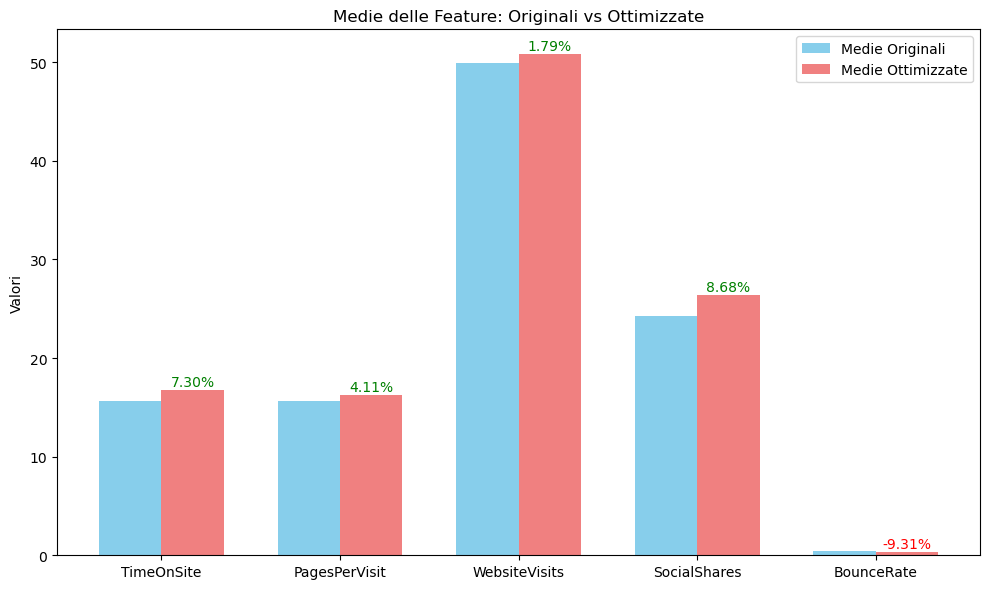

In [394]:
import numpy as np
import matplotlib.pyplot as plt

# Dati originali e ottimizzati
features = ['TimeOnSite', 'PagesPerVisit', 'WebsiteVisits', 'SocialShares', 'BounceRate']
original_means = [15.60, 15.63, 49.91, 24.28, 0.40]
optimized_means = [16.74, 16.27, 50.80, 26.39, 0.36]
percentage_changes = [7.30, 4.11, 1.79, 8.68, -9.31]

# Plotting
x = np.arange(len(features))  # Numero delle features
width = 0.35  # Larghezza delle barre

fig, ax = plt.subplots(figsize=(10, 6))

# Barre per le medie originali e ottimizzate
rects1 = ax.bar(x - width/2, original_means, width, label='Medie Originali', color='skyblue')
rects2 = ax.bar(x + width/2, optimized_means, width, label='Medie Ottimizzate', color='lightcoral')

# Etichette, titolo e legenda
ax.set_ylabel('Valori')
ax.set_title('Medie delle Feature: Originali vs Ottimizzate')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

# Aggiunta delle percentuali di variazione sopra le barre ottimizzate
for i in range(len(optimized_means)):
    color = 'red' if features[i] == 'BounceRate' else 'green'
    ax.text(x[i] + width/2, optimized_means[i] + 0.1, f'{percentage_changes[i]:.2f}%', 
            ha='center', va='bottom', fontsize=10, color=color)

plt.tight_layout()
plt.show()


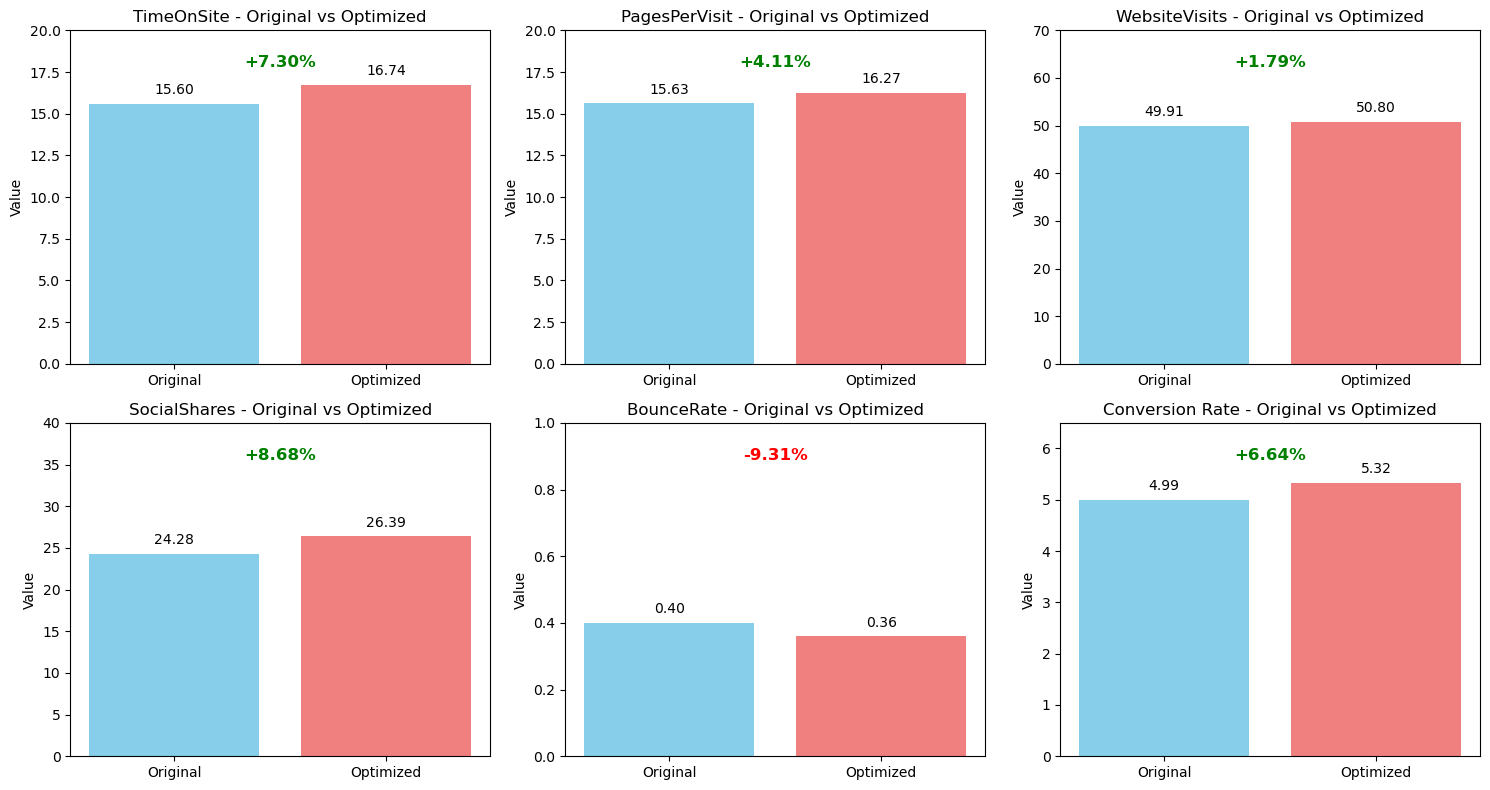

In [396]:
import numpy as np
import matplotlib.pyplot as plt

# Dati originali e ottimizzati
features = ['TimeOnSite', 'PagesPerVisit', 'WebsiteVisits', 'SocialShares', 'BounceRate']
original_means = [15.60, 15.63, 49.91, 24.28, 0.40]
optimized_means = [16.74, 16.27, 50.80, 26.39, 0.36]
percentage_changes = [7.30, 4.11, 1.79, 8.68, -9.31]

# Dati per il tasso di conversione
original_conversion_rate = 4.9925
optimized_conversion_rate = 5.3239
conversion_rate_change = 6.64

# Imposta i limiti y per ciascuna feature
ylims = [20, 20, 70, 40, 1]

# Crea un'unica figura con subplot 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Funzione per creare un grafico per ogni feature
def plot_feature_comparison(ax, feature, original, optimized, change, ylim):
    x = ['Original', 'Optimized']
    y = [original, optimized]
    
    bars = ax.bar(x, y, color=['skyblue', 'lightcoral'])

    # Aggiunge i valori delle medie sulle barre
    for bar, value in zip(bars, y):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (ylim * 0.02), 
                f'{value:.2f}', ha='center', va='bottom', fontsize=10)

    # Imposta il colore della variazione in base al segno
    color = 'green' if change > 0 else 'red'
    sign = '+' if change > 0 else '-'

    # Visualizza la variazione percentuale sopra le barre, leggermente abbassata
    ax.text(0.5, ylim * 0.88, f'{sign}{abs(change):.2f}%', ha='center', va='bottom', fontsize=12, color=color, weight='bold')

    # Etichette e titolo
    ax.set_ylabel('Value')
    ax.set_title(f'{feature} - Original vs Optimized')

    # Limiti per l'asse y per migliorare la visualizzazione
    ax.set_ylim(0, ylim)

# Plot per ciascuna feature nelle prime 5 posizioni
plot_feature_comparison(axes[0, 0], 'TimeOnSite', original_means[0], optimized_means[0], percentage_changes[0], ylim=ylims[0])
plot_feature_comparison(axes[0, 1], 'PagesPerVisit', original_means[1], optimized_means[1], percentage_changes[1], ylim=ylims[1])
plot_feature_comparison(axes[0, 2], 'WebsiteVisits', original_means[2], optimized_means[2], percentage_changes[2], ylim=ylims[2])
plot_feature_comparison(axes[1, 0], 'SocialShares', original_means[3], optimized_means[3], percentage_changes[3], ylim=ylims[3])
plot_feature_comparison(axes[1, 1], 'BounceRate', original_means[4], optimized_means[4], percentage_changes[4], ylim=ylims[4])

# Plot del Conversion Rate con ylim aumentato
plot_feature_comparison(axes[1, 2], 'Conversion Rate', original_conversion_rate, optimized_conversion_rate, conversion_rate_change, ylim=6.5)

# Disposizione compatta
plt.tight_layout()
plt.show()


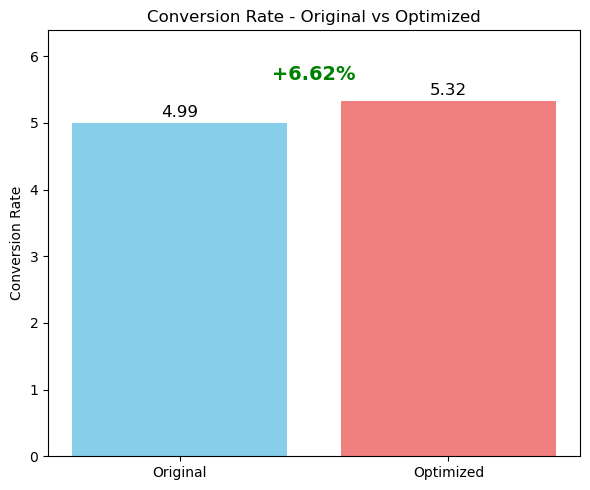

In [397]:
import matplotlib.pyplot as plt

# Dati del conversion rate
original_conversion_rate = 4.9925
optimized_conversion_rate = 5.3232
conversion_rate_change = 6.62  # Aggiornato il valore della variazione percentuale

# Crea una nuova figura per il Conversion Rate
fig, ax = plt.subplots(figsize=(6, 5))

# Valori di "Original" e "Optimized"
x = ['Original', 'Optimized']
y = [original_conversion_rate, optimized_conversion_rate]

# Crea il grafico a barre
bars = ax.bar(x, y, color=['skyblue', 'lightcoral'])

# Aggiunge i valori delle medie sulle barre con arrotondamento a due cifre decimali
for bar, value in zip(bars, y):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
            f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Determina il segno e il colore della variazione
sign = '+' if conversion_rate_change > 0 else '-'
color = 'green' if conversion_rate_change > 0 else 'red'

# Aggiunge la variazione percentuale al centro in alto, senza la scritta "change"
ax.text(0.5, max(y) * 1.05, f'{sign}{abs(conversion_rate_change):.2f}%', 
        ha='center', va='bottom', fontsize=14, color=color, weight='bold')

# Etichette e titolo
ax.set_ylabel('Conversion Rate')
ax.set_title('Conversion Rate - Original vs Optimized')

# Imposta i limiti dell'asse y
ax.set_ylim(0, max(y) * 1.2)

# Mostra il grafico
plt.tight_layout()
plt.show()


## Algoritmo con adspend entro 5%

In [390]:

# Rimuoviamo le colonne non necessarie dal DataFrame
df = df.drop(columns=['email_opens', 'email_clicks'], errors='ignore')

# Media attuale del conversion rate
current_conversion_rate_mean = df['conversion_rate'].mean()

# Definizione dei vincoli per ciascuna feature
feature_means = {
    'time_on_site': df['time_on_site'].mean(),
    'pages_per_visit': df['pages_per_visit'].mean(),
    'website_visits': df['website_visits'].mean(),
    'social_shares': df['social_shares'].mean(),
    'bounce_rate': df['bounce_rate'].mean(),
    'ad_spend': df['ad_spend'].mean()  # AdSpend base
}

# Funzione fitness con penalità severa per AdSpend
def fitness_function(individual):
    X_what_if = df.copy()
    
    # Manteniamo AdSpend fermo fino a un massimo di +3% per aumentare la severità
    X_what_if['ad_spend'] = individual[0]
    
    # Aggiorniamo tutte le feature ottimizzabili
    X_what_if['time_on_site'] = individual[1]
    X_what_if['pages_per_visit'] = individual[2]
    X_what_if['website_visits'] = individual[3]
    X_what_if['social_shares'] = individual[4]
    X_what_if['bounce_rate'] = max(individual[5], feature_means['bounce_rate'] * 0.90)  # Bounce rate limitato a -10%
    
    # Previsione del conversion rate con il modello addestrato
    y_pred_what_if = xgb_model.predict(X_what_if.drop(columns=['conversion_rate']))
    new_conversion_rate_mean = y_pred_what_if.mean()

    # Penalità per violazione dei vincoli sulle feature
    penalty = 0
    if individual[0] > feature_means['ad_spend'] * 1.03:
        penalty += abs(individual[0] - feature_means['ad_spend'] * 1.03) * 5  # Penalità severa per AdSpend
    if individual[1] > feature_means['time_on_site'] * 1.10:
        penalty += abs(individual[1] - feature_means['time_on_site'] * 1.10)
    if individual[2] > feature_means['pages_per_visit'] * 1.10:
        penalty += abs(individual[2] - feature_means['pages_per_visit'] * 1.10)
    if individual[3] > feature_means['website_visits'] * 1.10:
        penalty += abs(individual[3] - feature_means['website_visits'] * 1.10)
    if individual[4] > feature_means['social_shares'] * 1.10:
        penalty += abs(individual[4] - feature_means['social_shares'] * 1.10)
    if individual[5] < feature_means['bounce_rate'] * 0.90:
        penalty += abs(individual[5] - feature_means['bounce_rate'] * 0.90)
    
    # Penalità aggiuntiva se l'aumento del conversion rate non supera il 10%
    target_increase = current_conversion_rate_mean * 1.10
    if new_conversion_rate_mean < target_increase:
        penalty += abs(target_increase - new_conversion_rate_mean)
    
    # La fitness è il conversion rate con penalità applicata
    return new_conversion_rate_mean - penalty,

# Impostazioni per DEAP (algoritmo genetico)
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Inizializza le feature, includendo AdSpend variabile (fino a +3%)
toolbox.register("attr_float_ad_spend", random.uniform, feature_means['ad_spend'], feature_means['ad_spend'] * 1.03)  # AdSpend variabile con limite massimo di +3%
toolbox.register("attr_float_time", random.uniform, feature_means['time_on_site'], feature_means['time_on_site'] * 1.10)
toolbox.register("attr_float_pages", random.uniform, feature_means['pages_per_visit'], feature_means['pages_per_visit'] * 1.10)
toolbox.register("attr_float_visits", random.uniform, feature_means['website_visits'], feature_means['website_visits'] * 1.10)
toolbox.register("attr_float_social", random.uniform, feature_means['social_shares'], feature_means['social_shares'] * 1.10)
toolbox.register("attr_float_bounce", random.uniform, feature_means['bounce_rate'] * 0.90, feature_means['bounce_rate'])

# Crea l'individuo con tutte le feature più AdSpend variabile
toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_float_ad_spend, toolbox.attr_float_time, toolbox.attr_float_pages, 
                  toolbox.attr_float_visits, toolbox.attr_float_social, toolbox.attr_float_bounce), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.05, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness_function)

# Parametri evolutivi
population = toolbox.population(n=50)
NGEN = 40
CXPB = 0.7
MUTPB = 0.2

# Esecuzione dell'algoritmo genetico
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
    fits = list(map(toolbox.evaluate, offspring))
    
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    
    population = toolbox.select(offspring, k=len(population))

# Selezione della soluzione ottimale
best_individual = tools.selBest(population, 1)[0]

# Risultati ottimizzati per le feature
optimal_features = best_individual

# Stampa delle feature ottimizzate
print(f"Valori ottimizzati delle feature per il miglioramento del conversion rate con AdSpend variabile:")
print(f"AdSpend: da {df['ad_spend'].mean():.2f} a {optimal_features[0]:.2f}")
print(f"TimeOnSite: da {df['time_on_site'].mean():.2f} a {optimal_features[1]:.2f}")
print(f"PagesPerVisit: da {df['pages_per_visit'].mean():.2f} a {optimal_features[2]:.2f}")
print(f"WebsiteVisits: da {df['website_visits'].mean():.2f} a {optimal_features[3]:.2f}")
print(f"SocialShares: da {df['social_shares'].mean():.2f} a {optimal_features[4]:.2f}")
print(f"BounceRate: da {df['bounce_rate'].mean():.2f} a {optimal_features[5]:.2f}")

# Calcolo delle variazioni in percentuale
def percent_change(original, optimized):
    return ((optimized - original) / original) * 100

print("\nVariazioni percentuali rispetto alle medie originali:")
print(f"AdSpend: {percent_change(df['ad_spend'].mean(), optimal_features[0]):.2f}%")
print(f"TimeOnSite: {percent_change(df['time_on_site'].mean(), optimal_features[1]):.2f}%")
print(f"PagesPerVisit: {percent_change(df['pages_per_visit'].mean(), optimal_features[2]):.2f}%")
print(f"WebsiteVisits: {percent_change(df['website_visits'].mean(), optimal_features[3]):.2f}%")
print(f"SocialShares: {percent_change(df['social_shares'].mean(), optimal_features[4]):.2f}%")
print(f"BounceRate: {percent_change(df['bounce_rate'].mean(), optimal_features[5]):.2f}%")

# Previsione del nuovo conversion rate
X_test_what_if = df.copy()
X_test_what_if['ad_spend'] = optimal_features[0]  # AdSpend variabile
X_test_what_if['time_on_site'] = optimal_features[1]
X_test_what_if['pages_per_visit'] = optimal_features[2]
X_test_what_if['website_visits'] = optimal_features[3]
X_test_what_if['social_shares'] = optimal_features[4]
X_test_what_if['bounce_rate'] = optimal_features[5]

y_pred_what_if = xgb_model.predict(X_test_what_if.drop(columns=['conversion_rate']))
new_conversion_rate_mean = y_pred_what_if.mean()

# Calcolo della variazione percentuale del conversion rate
conversion_rate_change = percent_change(current_conversion_rate_mean, new_conversion_rate_mean)

print(f"\nConversion Rate medio attuale: {current_conversion_rate_mean:.2f}")
print(f"Conversion Rate ottimizzato con aumento AdSpend: {new_conversion_rate_mean:.2f}")
print(f"Variazione percentuale del Conversion Rate: {conversion_rate_change:.2f}%")


/opt/anaconda3/envs/env_DAs/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/anaconda3/envs/env_DAs/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Valori ottimizzati delle feature per il miglioramento del conversion rate con AdSpend variabile:
AdSpend: da 2505.21 a 2571.66
TimeOnSite: da 15.60 a 16.69
PagesPerVisit: da 15.63 a 16.40
WebsiteVisits: da 49.91 a 52.26
SocialShares: da 24.28 a 26.22
BounceRate: da 0.40 a 0.36

Variazioni percentuali rispetto alle medie originali:
AdSpend: 2.65%
TimeOnSite: 6.94%
PagesPerVisit: 4.91%
WebsiteVisits: 4.73%
SocialShares: 8.00%
BounceRate: -9.81%

Conversion Rate medio attuale: 4.99
Conversion Rate ottimizzato con aumento AdSpend: 5.42
Variazione percentuale del Conversion Rate: 8.47%


### Grafici algoritmo con adspend entro 5%

In [392]:
import pandas as pd
import altair as alt

# Dati delle feature originali e ottimizzate
features = ['AdSpend', 'TimeOnSite', 'PagesPerVisit', 'WebsiteVisits', 'SocialShares', 'BounceRate']
original_means = [2505.21, 15.60, 15.63, 49.91, 24.28, 0.40]
optimized_means = [2571.66, 16.69, 16.40, 52.26, 26.22, 0.36]
percentage_changes = [2.65, 6.94, 4.91, 4.73, 8.00, -9.81]

# Creiamo un DataFrame per Altair
data = {
    'Feature': features + features,
    'Value': original_means + optimized_means,
    'Type': ['Original'] * len(features) + ['Optimized'] * len(features),
    'Percentage Change': percentage_changes + percentage_changes
}
df_medie2 = pd.DataFrame(data)

# Grafico con punti e linee di connessione
line_chart = alt.Chart(df_medie2).mark_line(point=True).encode(
    x=alt.X('Feature:N', title='Features'),
    y=alt.Y('Value:Q', title='Mean Values'),
    color=alt.Color('Type:N', scale=alt.Scale(domain=['Original', 'Optimized'], range=['orange', 'blue'])),
    tooltip=['Feature', 'Value', 'Type']
).properties(
    title="Original vs Optimized Feature Means with Percentage Change",
    width=800,
    height=400
)

# Aggiungi etichette con la variazione percentuale sui punti ottimizzati
text_labels = alt.Chart(df_medie2[df_medie2['Type'] == 'Optimized']).mark_text(
    align='left',
    baseline='middle',
    dx=10,  # Spostamento orizzontale per evitare sovrapposizione con i punti
    dy=-10,  # Spostamento verticale per evitare sovrapposizione con le linee
    fontSize=12
).encode(
    x=alt.X('Feature:N'),
    y=alt.Y('Value:Q'),
    text=alt.Text('Percentage Change:Q', format='+.2f'),  # Visualizza la variazione percentuale
    color=alt.condition(
        alt.datum['Percentage Change'] > 0, alt.value('green'), alt.value('red')  # Verde per aumenti, rosso per diminuzioni
    )
)

# Combina il grafico con i punti, le linee e le etichette
final_chart = line_chart + text_labels

# Mostra il grafico interattivo
final_chart


alt.LayerChart(...)

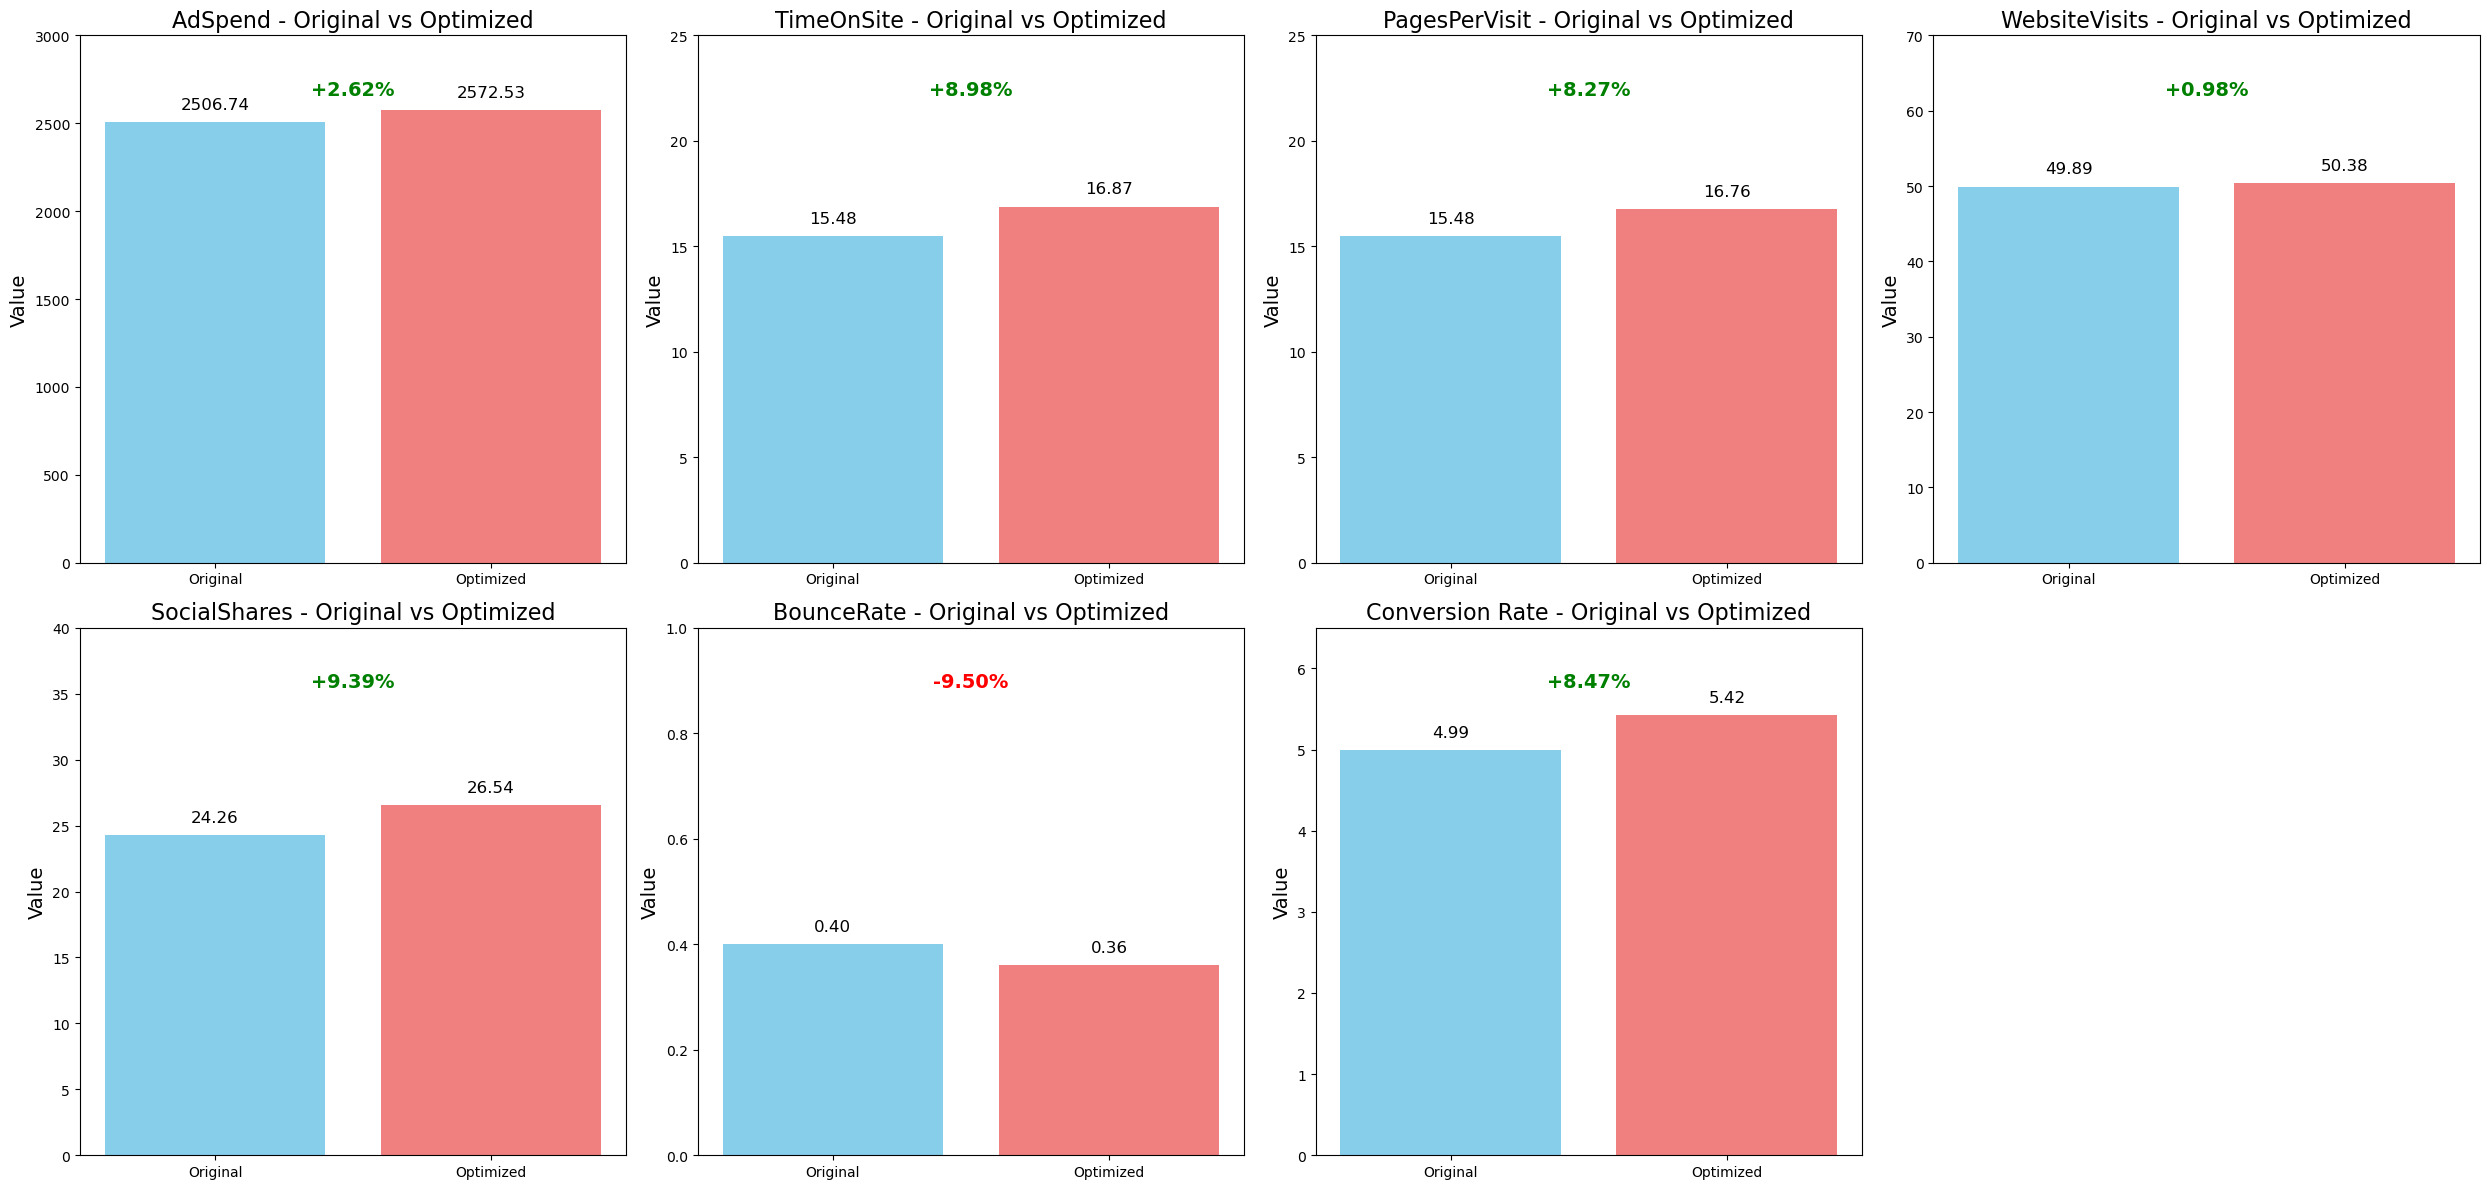

In [343]:

# Dati originali e ottimizzati
features = ['AdSpend', 'TimeOnSite', 'PagesPerVisit', 'WebsiteVisits', 'SocialShares', 'BounceRate']
original_means = [2506.74, 15.48, 15.48, 49.89, 24.26, 0.40]
optimized_means = [2572.53, 16.87, 16.76, 50.38, 26.54, 0.36]
percentage_changes = [2.62, 8.98, 8.27, 0.98, 9.39, -9.50]

# Conversion rate data
original_conversion_rate = 4.99
optimized_conversion_rate = 5.42
conversion_rate_change = 8.47

# Imposta i limiti y per ciascuna feature
ylims = [3000, 25, 25, 70, 40, 1, 6.5]

# Crea un'unica figura con subplot 2x4 e aumenta la figsize
fig, axes = plt.subplots(2, 4, figsize=(25, 12))  # Aumenta la larghezza e altezza del grafico

# Funzione per creare un grafico per ogni feature
def plot_feature_comparison(ax, feature, original, optimized, change, ylim):
    x = ['Original', 'Optimized']
    y = [original, optimized]
    
    bars = ax.bar(x, y, color=['skyblue', 'lightcoral'])

    # Aggiunge i valori delle medie sulle barre
    for bar, value in zip(bars, y):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (ylim * 0.02), 
                f'{value:.2f}', ha='center', va='bottom', fontsize=12)

    # Imposta il colore della variazione in base al segno
    color = 'green' if change > 0 else 'red'
    sign = '+' if change > 0 else '-'

    # Visualizza la variazione percentuale sopra le barre, leggermente abbassata
    ax.text(0.5, ylim * 0.88, f'{sign}{abs(change):.2f}%', ha='center', va='bottom', fontsize=14, color=color, weight='bold')

    # Etichette e titolo
    ax.set_ylabel('Value', fontsize=14)
    ax.set_title(f'{feature} - Original vs Optimized', fontsize=16)

    # Limiti per l'asse y per migliorare la visualizzazione
    ax.set_ylim(0, ylim)

# Plot per ciascuna feature nelle prime 6 posizioni
plot_feature_comparison(axes[0, 0], 'AdSpend', original_means[0], optimized_means[0], percentage_changes[0], ylim=ylims[0])
plot_feature_comparison(axes[0, 1], 'TimeOnSite', original_means[1], optimized_means[1], percentage_changes[1], ylim=ylims[1])
plot_feature_comparison(axes[0, 2], 'PagesPerVisit', original_means[2], optimized_means[2], percentage_changes[2], ylim=ylims[2])
plot_feature_comparison(axes[0, 3], 'WebsiteVisits', original_means[3], optimized_means[3], percentage_changes[3], ylim=ylims[3])
plot_feature_comparison(axes[1, 0], 'SocialShares', original_means[4], optimized_means[4], percentage_changes[4], ylim=ylims[4])
plot_feature_comparison(axes[1, 1], 'BounceRate', original_means[5], optimized_means[5], percentage_changes[5], ylim=ylims[5])

# Plot del Conversion Rate con ylim aumentato
plot_feature_comparison(axes[1, 2], 'Conversion Rate', original_conversion_rate, optimized_conversion_rate, conversion_rate_change, ylim=ylims[6])

# Rimuovi l'ultimo grafico vuoto
fig.delaxes(axes[1, 3])

# Disposizione compatta
plt.tight_layout()
plt.show()


## Valutazione scenari

In [344]:

# Dati per Scenario NO Investimento e Scenario Investimento
features = ['TimeOnSite', 'PagesPerVisit', 'WebsiteVisits', 'SocialShares', 'BounceRate', 'AdSpend', 'Conversion Rate']
scenario_no_investimento_changes = [7.75, 9.01, 7.01, 8.98, -9.65, 0, 6.64]  # AdSpend bloccato
scenario_investimento_changes = [8.98, 8.27, 0.98, 9.39, -9.50, 2.62, 8.47]

# Creiamo un DataFrame per Altair
data = {
    'Feature': features + features,
    'Percentage Change': scenario_no_investimento_changes + scenario_investimento_changes,
    'Scenario': ['Scenario NO Investimento'] * len(features) + ['Scenario Investimento'] * len(features)
}
df_medie3 = pd.DataFrame(data)

# Grafico a barre comparativo
bar_chart = alt.Chart(df_medie3).mark_bar().encode(
    x=alt.X('Feature:N', title='Features'),
    y=alt.Y('Percentage Change:Q', title='Percentage Change (%)'),
    color='Scenario:N',
    tooltip=['Feature', 'Percentage Change', 'Scenario']
).properties(
    title="Comparison of Percentage Changes in Features and Conversion Rate: Scenario NO Investimento vs Scenario Investimento",
    width=900,
    height=400
)

# Mostra il grafico
bar_chart.display()


alt.Chart(...)

In sintesi, Scenario senza investimento è più costo-efficace, ma Scenario con investimento può essere giustificato se l'azienda è disposta a investire in AdSpend per massimizzare ulteriormente il Conversion Rate e se quei valori delle features non possono essere raggiunti solo tramite modifiche seo

## Modello per trimestri

### Aggiunta quarter al df

In [434]:

# Numero totale di righe nel DataFrame
n_rows = len(df)

# Distribuisci i trimestri con più frequenza nel Q4 e meno nel Q1
q4_ratio = 0.4
q3_ratio = 0.3
q2_ratio = 0.2
q1_ratio = 0.1

# Calcolo del numero di righe per ciascun trimestre
n_q4 = int(n_rows * q4_ratio)
n_q3 = int(n_rows * q3_ratio)
n_q2 = int(n_rows * q2_ratio)
n_q1 = n_rows - (n_q4 + n_q3 + n_q2)  # Il resto va a Q1

# Crea una lista con i trimestri distribuiti
quarters = ['Q4'] * n_q4 + ['Q3'] * n_q3 + ['Q2'] * n_q2 + ['Q1'] * n_q1

# Mescola i trimestri per distribuirli casualmente nel DataFrame
np.random.shuffle(quarters)

# Aggiungi la colonna "quarter" al DataFrame
df['quarter'] = quarters

# Correlazione positiva con il conversion rate
# Aumenta il conversion rate in base al trimestre (Q1 meno conversioni, Q4 più conversioni)
def adjust_conversion_rate(row):
    if row['quarter'] == 'Q1':
        return row['conversion_rate'] * 0.8  # Riduci conversion rate
    elif row['quarter'] == 'Q2':
        return row['conversion_rate'] * 0.9
    elif row['quarter'] == 'Q3':
        return row['conversion_rate'] * 1.1
    elif row['quarter'] == 'Q4':
        return row['conversion_rate'] * 1.2  # Aumenta conversion rate

df['conversion_rate'] = df.apply(adjust_conversion_rate, axis=1)

# Salva il DataFrame modificato su un nuovo file CSV
df.to_csv('df_definitivo_con_quarters.csv', index=False)


In [435]:
df.head()

,ad_spend,time_on_site,pages_per_visit,website_visits,bounce_rate,social_shares,email_opens,email_clicks,conversion_rate,quarter
0,1885.209792,22.169951,21.0,89,0.400454,11,77,3,5.491779,Q3
1,4754.557246,6.350848,6.0,28,0.103295,43,17,26,5.809089,Q2
2,3665.329830,11.052551,11.0,77,0.638079,16,0,3,6.959779,Q4
3,3001.319251,20.235138,20.0,32,0.466222,8,65,16,6.931705,Q4
4,796.972829,14.980591,14.0,48,0.462717,14,17,13,2.772459,Q1


<Axes: >

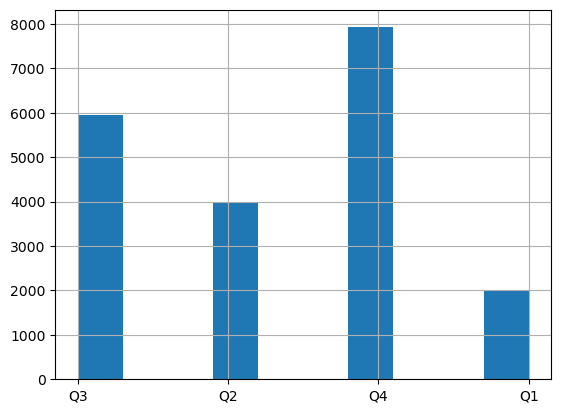

In [436]:
df['quarter'].hist()

### Creazione modello trimestri

In [437]:

# Copia del 'quarter' per mantenere traccia
df['quarter_original'] = df['quarter'].copy()

# Mappiamo 'quarter' a numerico per calcolo delle variabili stagionali
quarter_mapping = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
df['quarter'] = df['quarter'].map(quarter_mapping)

# Aggiungiamo le variabili stagionali
df['quarter_sin'] = np.sin(2 * np.pi * (df['quarter'] - 1) / 4)
df['quarter_cos'] = np.cos(2 * np.pi * (df['quarter'] - 1) / 4)

# Definizione delle feature e variabile target
features = ['ad_spend', 'time_on_site', 'pages_per_visit', 'website_visits', 'bounce_rate', 'social_shares', 'quarter_sin', 'quarter_cos']
X = df[features]
y = df['conversion_rate']

# Manteniamo traccia del trimestre per ogni campione
X['quarter'] = df['quarter_original']
y_quarter = df['quarter_original']

# Suddivisione in training e test set
X_train, X_test, y_train, y_test, train_quarters, test_quarters = train_test_split(X, y, y_quarter, test_size=0.2, random_state=42)

# Rimuoviamo la colonna 'quarter' per l'addestramento
X_train = X_train.drop(columns=['quarter'])
X_test = X_test.drop(columns=['quarter'])

# Creazione del modello
xgb_model_Q = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Addestramento del modello
xgb_model_Q.fit(X_train, y_train)

# Funzione per calcolare metriche di performance
def evaluate_performance(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

# Creiamo un dizionario per raccogliere i risultati per trimestre
results = {
    'train': {1: {}, 2: {}, 3: {}, 4: {}},
    'test': {1: {}, 2: {}, 3: {}, 4: {}}
}

# Ora possiamo eseguire previsioni per ogni trimestre sia sul test set che sul training set
for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
    # Filtra per il test set del trimestre corrente
    X_quarter_test = X_test.loc[test_quarters == quarter]
    y_quarter_test = y_test.loc[test_quarters == quarter]

    # Filtra per il training set del trimestre corrente
    X_quarter_train = X_train.loc[train_quarters == quarter]
    y_quarter_train = y_train.loc[train_quarters == quarter]
    
    # Predizioni per il test set
    if len(X_quarter_test) > 0:
        y_quarter_pred_test = xgb_model_Q.predict(X_quarter_test)
        mae_test, mse_test, r2_test = evaluate_performance(y_quarter_test, y_quarter_pred_test)
        results['test'][quarter] = {'MAE': mae_test, 'MSE': mse_test, 'R²': r2_test}
    
    # Predizioni per il training set
    if len(X_quarter_train) > 0:
        y_quarter_pred_train = xgb_model_Q.predict(X_quarter_train)
        mae_train, mse_train, r2_train = evaluate_performance(y_quarter_train, y_quarter_pred_train)
        results['train'][quarter] = {'MAE': mae_train, 'MSE': mse_train, 'R²': r2_train}

# Stampa delle performance
for set_type in ['train', 'test']:
    print(f"\nPerformance sul {set_type.capitalize()} Set per ogni trimestre:")
    for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
        if results[set_type][quarter]:
            print(f"Trimestre {quarter} - MAE: {results[set_type][quarter]['MAE']:.4f}, "
                  f"MSE: {results[set_type][quarter]['MSE']:.4f}, "
                  f"R²: {results[set_type][quarter]['R²']:.4f}")
        else:
            print(f"Trimestre {quarter} - Nessun dato disponibile")



Performance sul Train Set per ogni trimestre:
Trimestre Q1 - MAE: 0.0352, MSE: 0.0020, R²: 0.9983
Trimestre Q2 - MAE: 0.0378, MSE: 0.0022, R²: 0.9985
Trimestre Q3 - MAE: 0.0420, MSE: 0.0028, R²: 0.9988
Trimestre Q4 - MAE: 0.0433, MSE: 0.0030, R²: 0.9989

Performance sul Test Set per ogni trimestre:
Trimestre Q1 - MAE: 0.0401, MSE: 0.0025, R²: 0.9979
Trimestre Q2 - MAE: 0.0416, MSE: 0.0027, R²: 0.9982
Trimestre Q3 - MAE: 0.0477, MSE: 0.0036, R²: 0.9985
Trimestre Q4 - MAE: 0.0486, MSE: 0.0038, R²: 0.9985


/var/folders/z5/ql92fy5n5md52b43qh02f6km0000gn/T/ipykernel_59025/2189943066.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['quarter'] = df['quarter_original']


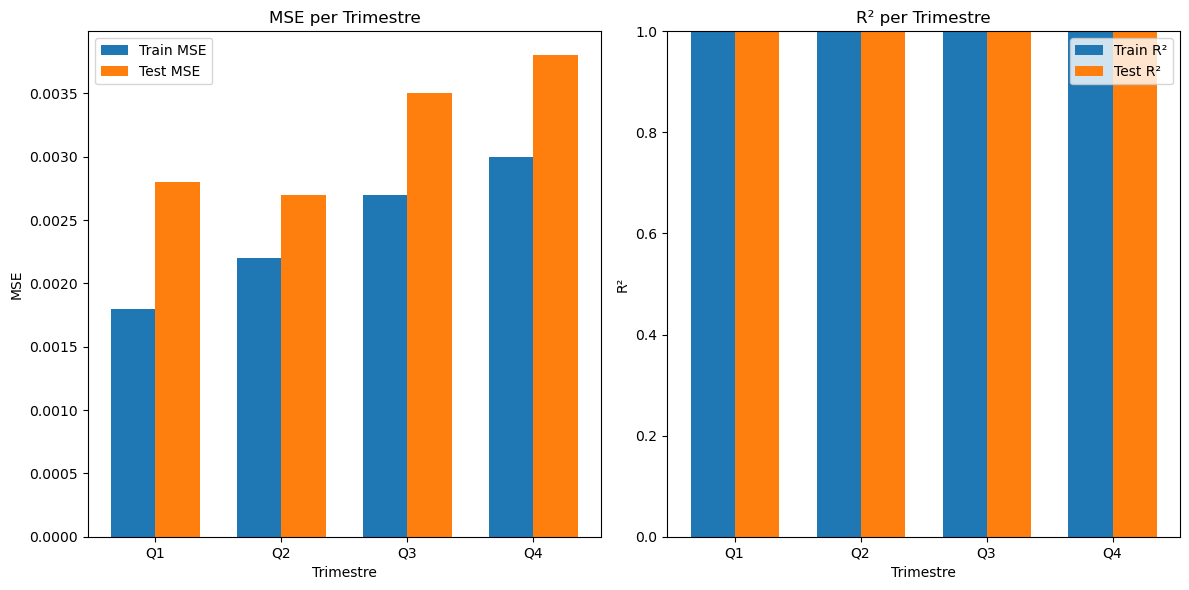

In [438]:
# Dati per ogni trimestre
trimestri = ['Q1', 'Q2', 'Q3', 'Q4']

# Performance sul Train Set
train_mse = [0.0018, 0.0022, 0.0027, 0.0030]
train_r2 = [0.9985, 0.9985, 0.9988, 0.9989]

# Performance sul Test Set
test_mse = [0.0028, 0.0027, 0.0035, 0.0038]
test_r2 = [0.9977, 0.9983, 0.9985, 0.9986]

# Imposta la larghezza delle barre e la posizione
bar_width = 0.35
index = np.arange(len(trimestri))

# Crea i subplot per MSE e R²
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot per MSE
axes[0].bar(index, train_mse, bar_width, label='Train MSE')
axes[0].bar(index + bar_width, test_mse, bar_width, label='Test MSE')
axes[0].set_xlabel('Trimestre')
axes[0].set_ylabel('MSE')
axes[0].set_title('MSE per Trimestre')
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(trimestri)
axes[0].legend()

# Plot per R²
axes[1].bar(index, train_r2, bar_width, label='Train R²')
axes[1].bar(index + bar_width, test_r2, bar_width, label='Test R²')
axes[1].set_xlabel('Trimestre')
axes[1].set_ylabel('R²')
axes[1].set_ylim(0, 1.0)  # Imposta il limite dell'asse y a 1.0
axes[1].set_title('R² per Trimestre')
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(trimestri)
axes[1].legend()

# Aggiungi un po' di spazio tra i subplot
plt.tight_layout()

# Mostra i grafici
plt.show()


Risultat ottimi: conviene valuare i parametri ottimali con algoritmo genetico usando questo nuovo modello

### Valutazioni medie CR per trimestre e media overall

In [403]:
df.groupby('quarter_original')['conversion_rate'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
quarter_original,,,,,,,,
Q1,1983.0,3.95,1.08,0.69,3.21,4.06,4.82,5.95
Q2,3963.0,4.51,1.22,1.01,3.67,4.69,5.48,6.69
Q3,5945.0,5.50,1.50,0.92,4.42,5.72,6.73,8.21
Q4,7927.0,5.98,1.64,1.08,4.82,6.22,7.30,8.93


/var/folders/z5/ql92fy5n5md52b43qh02f6km0000gn/T/ipykernel_59025/3321323260.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quarter', y='conversion_rate', data=df_combined, palette=palette, order=order)


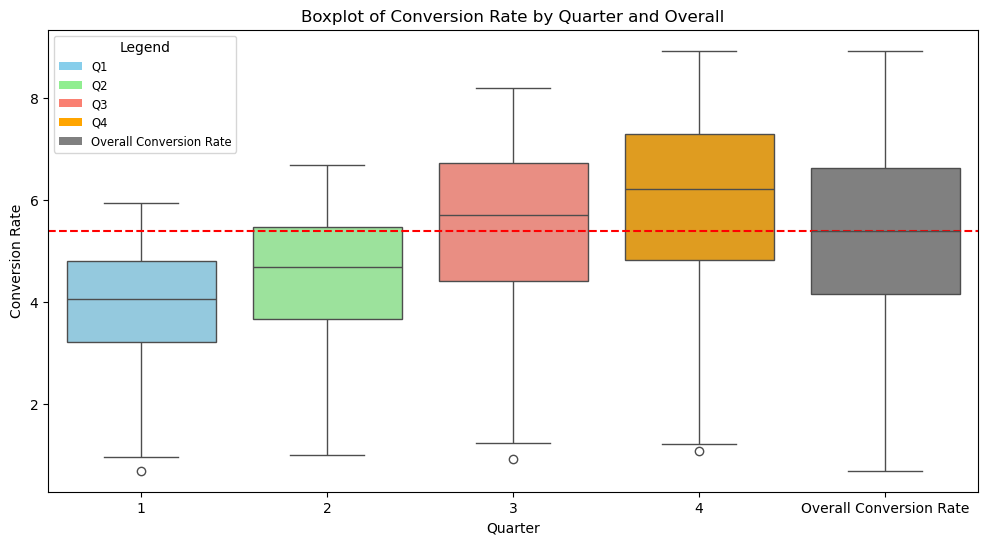

In [404]:

# Aggiungi una categoria 'Overall Conversion Rate' per il boxplot globale
df_global = df.copy()
df_global['quarter'] = 'Overall Conversion Rate'  # Aggiungiamo una categoria per rappresentare il boxplot generale

# Concatenare il DataFrame originale con quello globale
df_combined = pd.concat([df, df_global])

# Creiamo la palette per i colori
palette = {"1": "skyblue", "2": "lightgreen", "3": "salmon", "4": "orange", "Overall Conversion Rate": "gray"}

# Calcola la mediana globale del conversion rate
global_median = df['conversion_rate'].median()

# Definire l'ordine dei boxplot (da Q1 a Q4, poi Overall Conversion Rate)
order = ['1', '2', '3', '4', 'Overall Conversion Rate']

# Creare il boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='quarter', y='conversion_rate', data=df_combined, palette=palette, order=order)

# Aggiungere una linea orizzontale alla mediana globale
plt.axhline(global_median, color='red', linestyle='--', label=f'Global Median: {global_median:.2f}')

# Aggiungere etichette e titolo
plt.xlabel('Quarter')
plt.ylabel('Conversion Rate')
plt.title('Boxplot of Conversion Rate by Quarter and Overall')

# Creare una legenda personalizzata per i colori dei boxplot
legend_elements = [Patch(facecolor='skyblue', label='Q1'),
                   Patch(facecolor='lightgreen', label='Q2'),
                   Patch(facecolor='salmon', label='Q3'),
                   Patch(facecolor='orange', label='Q4'),
                   Patch(facecolor='gray', label='Overall Conversion Rate')]

# Aggiungere la legenda al grafico e ridurre la dimensione del font
plt.legend(handles=legend_elements, title='Legend', fontsize='small', title_fontsize='medium', loc='best')

# Mostra il grafico
plt.show()


### medie features per trimestre 

In [405]:
mean_features_by_quarter = df.groupby('quarter_original').mean()

# Stampa delle medie raggruppate per 'quarter_original'
print("Medie delle feature e del conversion rate raggruppate per 'quarter_original':")
print(mean_features_by_quarter[['ad_spend', 'time_on_site', 'pages_per_visit', 
                                'website_visits', 'bounce_rate', 'social_shares', 
                                'conversion_rate']])

Medie delle feature e del conversion rate raggruppate per 'quarter_original':
                     ad_spend  time_on_site  pages_per_visit  website_visits  \
quarter_original                                                               
Q1                2454.562134     15.274186        15.254665       50.691377   
Q2                2529.023998     15.560788        15.629574       49.752208   
Q3                2508.880405     15.734652        15.738940       50.164508   
Q4                2503.209731     15.612564        15.647281       49.591649   

                  bounce_rate  social_shares  conversion_rate  
quarter_original                                               
Q1                   0.397304      23.808371         3.950613  
Q2                   0.404532      24.140298         4.512628  
Q3                   0.398874      24.562153         5.503856  
Q4                   0.399874      24.258484         5.984309  


In [ ]:
#Non funziona

# Carica il tuo modello XGBoost
xgb_model_Q = joblib.load('xgb_model_Q.pkl')  # Assicurati di avere il percorso corretto del file

# Medie iniziali delle features
initial_means = {
    'time_on_site': 15.60,
    'pages_per_visit': 15.63,
    'website_visits': 49.91,
    'bounce_rate': 0.40,
    'social_shares': 24.28,
}

# Medie ottimali delle features
optimal_means = {
    'time_on_site': 16.74,
    'pages_per_visit': 16.27,
    'website_visits': 50.80,
    'bounce_rate': 0.36,
    'social_shares': 26.39,
}

# Limiti per le features
feature_bounds = {
    'time_on_site': (initial_means['time_on_site'], optimal_means['time_on_site']),
    'pages_per_visit': (initial_means['pages_per_visit'], optimal_means['pages_per_visit']),
    'website_visits': (initial_means['website_visits'], optimal_means['website_visits']),
    'bounce_rate': (optimal_means['bounce_rate'], initial_means['bounce_rate']),  # Può aumentare o diminuire
    'social_shares': (initial_means['social_shares'], optimal_means['social_shares']),
}

# Crea l'individuo per DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Registrazione degli attributi dell'individuo
toolbox.register("attr_float_time_on_site", random.uniform, feature_bounds['time_on_site'][0], feature_bounds['time_on_site'][1])
toolbox.register("attr_float_pages_per_visit", random.uniform, feature_bounds['pages_per_visit'][0], feature_bounds['pages_per_visit'][1])
toolbox.register("attr_float_website_visits", random.uniform, feature_bounds['website_visits'][0], feature_bounds['website_visits'][1])
toolbox.register("attr_float_bounce_rate", random.uniform, feature_bounds['bounce_rate'][0], feature_bounds['bounce_rate'][1])
toolbox.register("attr_float_social_shares", random.uniform, feature_bounds['social_shares'][0], feature_bounds['social_shares'][1])

# Crea l'individuo con tutte le feature tranne ad_spend
toolbox.register("individual", tools.initCycle, creator.Individual, 
                 (toolbox.attr_float_time_on_site, 
                  toolbox.attr_float_pages_per_visit, 
                  toolbox.attr_float_website_visits, 
                  toolbox.attr_float_bounce_rate, 
                  toolbox.attr_float_social_shares), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Funzione di fitness
def fitness_function(individual):
    # Creare un DataFrame per il modello
    X_what_if = pd.DataFrame([individual], columns=['time_on_site', 'pages_per_visit', 'website_visits', 'bounce_rate', 'social_shares'])
    
    # Aggiungi ad_spend fisso
    X_what_if['ad_spend'] = 2505.21  # Valore fisso di ad_spend
    
    # Aggiungi le variabili per quarter_sin e quarter_cos
    quarter = 1  # Esempio di trimestre 1, questo potrebbe variare
    X_what_if['quarter_sin'] = np.sin(2 * np.pi * (quarter - 1) / 4)
    X_what_if['quarter_cos'] = np.cos(2 * np.pi * (quarter - 1) / 4)
    
    # Predizione del conversion rate usando il modello xgb_model_Q
    predicted_conversion_rate = xgb_model_Q.predict(X_what_if)[0]  # Non serve DMatrix qui
    
    # Penalità per superamento dei vincoli
    penalty = 0
    for i, key in enumerate(initial_means.keys()):
        if individual[i] < feature_bounds[key][0]:
            penalty += abs(feature_bounds[key][0] - individual[i])
        elif individual[i] > feature_bounds[key][1]:
            penalty += abs(individual[i] - feature_bounds[key][1])

    return predicted_conversion_rate - penalty,

# Registrazione delle operazioni
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.05, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Parametri evolutivi
population = toolbox.population(n=50)
NGEN = 40
CXPB = 0.7
MUTPB = 0.2

# Dati per l'output
previous_values = initial_means.copy()

# Esecuzione dell'algoritmo genetico per ciascun trimestre
for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
    print(f"\nOttimizzazione per il trimestre {quarter}")

    # Esegui l'algoritmo genetico
    for gen in range(NGEN):
        offspring = algorithms.varAnd(population, toolbox, CXPB, MUTPB)
        fits = list(map(toolbox.evaluate, offspring))
        
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
            
        population = toolbox.select(offspring, k=len(population))

    # Seleziona la soluzione ottimale per il trimestre
    best_individual = tools.selBest(population, 1)[0]
    print(f"Soluzione ottimale per {quarter}: {best_individual}")

    # Calcola le variazioni
    for i, feature in enumerate(initial_means.keys()):
        change_percentage = ((best_individual[i] - previous_values[feature]) / previous_values[feature]) * 100
        print(f"{feature.capitalize()}: passaggio da {previous_values[feature]:.2f} a {best_individual[i]:.2f} ({change_percentage:.2f}% rispetto al trimestre precedente)")

    # Aggiorna i valori per il prossimo trimestre
    previous_values = {
        'time_on_site': best_individual[0],
        'pages_per_visit': best_individual[1],
        'website_visits': best_individual[2],
        'bounce_rate': best_individual[3],
        'social_shares': best_individual[4],
    }

print("Ottimizzazione completata per tutti i trimestri.")


In [355]:

# Dati per i trimestri con punteggi ottimizzati
data = {
    'Trimestre': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Time_on_site': [16.06, 16.15, 16.19, 16.79],
    'Pages_per_visit': [15.92, 16.13, 16.13, 17.15],
    'Website_visits': [51.00, 51.00, 51.00, 52.99],
    'Bounce_rate': [0.37, 0.36, 0.34, 0.36],
    'Social_shares': [24.33, 24.98, 24.98, 26.37]
}

# Creazione del DataFrame
df_quarter = pd.DataFrame(data)

# Visualizzazione del DataFrame
print(df_quarter)


  Trimestre  Time_on_site  Pages_per_visit  Website_visits  Bounce_rate  \
0        Q1         16.06            15.92           51.00         0.37   
1        Q2         16.15            16.13           51.00         0.36   
2        Q3         16.19            16.13           51.00         0.34   
3        Q4         16.79            17.15           52.99         0.36   

   Social_shares  
0          24.33  
1          24.98  
2          24.98  
3          26.37  


In [363]:
import pandas as pd
import altair as alt

# Dati per il DataFrame
data = {
    'Trimestre': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Time_on_site': [16.06, 16.15, 16.19, 16.79],
    'Pages_per_visit': [15.92, 16.13, 16.13, 17.15],
    'Website_visits': [51.00, 51.00, 51.00, 52.99],
    'Bounce_rate': [0.37, 0.36, 0.34, 0.36],
    'Social_shares': [24.33, 24.98, 24.98, 26.37]
}

# Creazione del DataFrame
df_quarter = pd.DataFrame(data)

# Media globale per ciascuna feature
global_means = {
    'Time_on_site': 15.604976,
    'Pages_per_visit': 15.631951,
    'Website_visits': 49.905641,
    'Bounce_rate': 0.400248,
    'Social_shares': 24.280906
}

# Melt DataFrame for Altair
df_melted = df_quarter.melt(id_vars='Trimestre', var_name='Metric', value_name='Value')

# Creazione di una lista per tenere i grafici
line_charts = []

# Limiti dell'asse y per ogni metrica
ylim_dict = {
    'Time_on_site': (15, 18),
    'Pages_per_visit': (15, 18),
    'Website_visits': (49, 55),
    'Bounce_rate': (0.30, 0.45),  # Aggiornato per il Bounce Rate
    'Social_shares': (24, 27),
}

# Colori per ogni metrica
color_dict = {
    'Time_on_site': 'blue',
    'Pages_per_visit': 'orange',
    'Website_visits': 'green',
    'Bounce_rate': 'red',
    'Social_shares': 'purple'
}

# Creazione del grafico per ogni metrica
for metric in df_quarter.columns[1:]:  # Salta la colonna 'Trimestre'
    chart = alt.Chart(df_melted[df_melted['Metric'] == metric]).mark_line(point=True, color=color_dict[metric]).encode(
        x=alt.X('Trimestre:O', title='Trimestre'),
        y=alt.Y('Value:Q', title=metric.replace('_', ' ').capitalize(), scale=alt.Scale(domain=ylim_dict[metric])),  # Limiti dell'asse y
        tooltip=['Trimestre:N', 'Value:Q']
    ).properties(
        title=metric.replace('_', ' ').capitalize(),
        width=300,
        height=200
    )

    # Aggiunta della retta orizzontale per la media globale
    global_mean = global_means[metric]
    chart += alt.Chart(pd.DataFrame({
        'Metric': [metric],
        'Global_Mean': [global_mean]
    })).mark_rule(color='red', strokeDash=[5, 5]).encode(
        y='Global_Mean:Q',
        tooltip=alt.Tooltip('Global_Mean:Q', title='Global Mean')
    ).properties(
        title='Global Mean'
    )

    line_charts.append(chart)

# Combinare tutti i grafici in un layout a griglia
# Prima riga con 3 grafici
row1 = alt.hconcat(*line_charts[:3])
# Seconda riga con 2 grafici
row2 = alt.hconcat(*line_charts[3:])

# Combinare le due righe verticalmente
final_chart = alt.vconcat(row1, row2).resolve_scale(
    color='independent'  # Assicurarsi che i colori siano indipendenti per ogni grafico
)

# Visualizzazione dei grafici combinati
final_chart


alt.VConcatChart(...)

In [439]:
joblib.dump(xgb_model_Q, 'xgb_model_Q.pkl')

['xgb_model_Q.pkl']

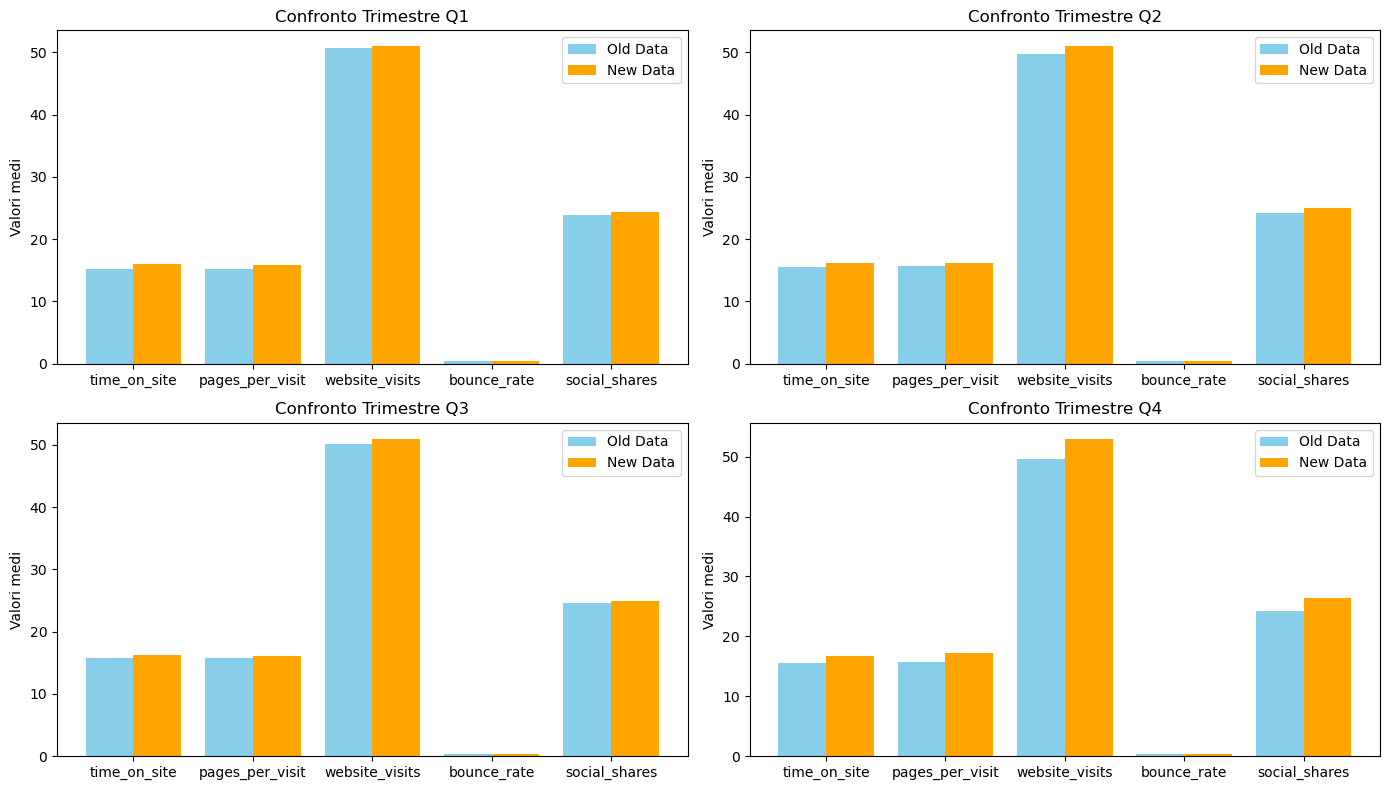

In [450]:
import matplotlib.pyplot as plt
import pandas as pd

# Dati della prima serie
data_old = {
    'quarter_original': ['Q1', 'Q2', 'Q3', 'Q4'],
    'time_on_site': [15.27, 15.56, 15.73, 15.61],
    'pages_per_visit': [15.25, 15.63, 15.74, 15.65],
    'website_visits': [50.69, 49.75, 50.16, 49.59],
    'bounce_rate': [0.40, 0.40, 0.40, 0.40],
    'social_shares': [23.81, 24.14, 24.56, 24.26]
}

# Dati della seconda serie
data_new = {
    'Trimestre': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Time_on_site': [16.06, 16.15, 16.19, 16.79],
    'Pages_per_visit': [15.92, 16.13, 16.13, 17.15],
    'Website_visits': [51.00, 51.00, 51.00, 52.99],
    'Bounce_rate': [0.37, 0.36, 0.34, 0.36],
    'Social_shares': [24.33, 24.98, 24.98, 26.37]
}

# Creazione dei DataFrame
df_old = pd.DataFrame(data_old)
df_new = pd.DataFrame(data_new)

# Creazione della disposizione di 4 plot per confrontare le serie di dati
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.ravel()

variables = ['time_on_site', 'pages_per_visit', 'website_visits', 'bounce_rate', 'social_shares']
new_variables = [var.capitalize() for var in variables]

# Creazione dei plot per ciascun trimestre
for i, trimestre in enumerate(df_old['quarter_original']):
    old_values = df_old.loc[i, variables].values
    new_values = df_new.loc[i, new_variables].values
    
    x = range(len(variables))

    # Creazione del bar plot con due barre per ogni variabile
    axes[i].bar(x, old_values, width=0.4, color='skyblue', label='Old Data', align='center')
    axes[i].bar([val + 0.4 for val in x], new_values, width=0.4, color='orange', label='New Data', align='center')

    # Impostazioni dei titoli e delle etichette
    axes[i].set_xticks([val + 0.2 for val in x])
    axes[i].set_xticklabels(variables)
    axes[i].set_title(f'Confronto Trimestre {trimestre}')
    axes[i].set_ylabel('Valori medi')
    axes[i].legend()

plt.tight_layout()
plt.show()
